# 6.7 Statistical Hypothesis testing


## 1 Import libraries and data
## 2 Data checking & Preparation
## 3 Calculate growth rates
## 4 T-test of EV growth rate vs population growth
   ### 4.5 interpret results
## 5 Linear Regression analysis of EV per capita increasing with #EVCS
   ### Interpret Results
## 6 Supervised Machine Learning - Creating models for High & Medium county clusters
    

#1. Import Libraries and Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os

from scipy.stats import ttest_ind

In [3]:
# Set the option to display graphs within the notebook.

%matplotlib inline

In [4]:
#Define file path

path = r'C:\Users\Caroline\Documents\Career Foundry\06 2023 EVCS washington state'

In [5]:
# Import data

df_present = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'WA_present_cluster.pkl'))
df_hist = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'WA_hist.pkl'))

#2 Data Checking & Preparation

In [7]:
#Check data and clean
df_hist.shape

(3203, 17)

In [8]:
df_present.shape

(1902, 26)

In [9]:
#Visual check of df_hist
df_hist.head()

,Date,County,BEV Registered,PHEV Registerd,EV Total,Non-EV Total,Total Vehicles,BEV %,Overall EV %,Year,Month,Station Count,Cum_CS_count,Cumulative EVCS WA,Estimated Population,EVs per person,Total Vehicles per person
0,2014-06-01,Adams,0,0,0,0,0,NaN,NaN,2014,6,1,1,9,19482,NaN,NaN
1,2017-01-01,Adams,1,1,2,17252,17254,50.000000,0.011592,2017,1,0,1,309,19968,0.00010,0.864083
2,2017-02-01,Adams,2,2,4,17197,17201,50.000000,0.023254,2017,2,0,1,316,19984,0.00020,0.860739
3,2017-03-01,Adams,2,4,6,17177,17183,33.333333,0.034918,2017,3,0,1,322,20000,0.00030,0.859150
4,2017-04-01,Adams,2,3,5,17200,17205,40.000000,0.029061,2017,4,0,1,331,20015,0.00025,0.859605


In [10]:
df_hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       3203 non-null   datetime64[ns]
 1   County                     3203 non-null   object        
 2   BEV Registered             3203 non-null   int32         
 3   PHEV Registerd             3203 non-null   int32         
 4   EV Total                   3203 non-null   int32         
 5   Non-EV Total               3203 non-null   int32         
 6   Total Vehicles             3203 non-null   int32         
 7   BEV %                      3003 non-null   float64       
 8   Overall EV %               3003 non-null   float64       
 9   Year                       3203 non-null   int32         
 10  Month                      3203 non-null   int32         
 11  Station Count              3203 non-null   int32         
 12  Cum_CS

In [11]:
# Drop rows with any NaN values
df_hist = df_hist.dropna()

In [12]:
df_hist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3003 entries, 1 to 3201
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       3003 non-null   datetime64[ns]
 1   County                     3003 non-null   object        
 2   BEV Registered             3003 non-null   int32         
 3   PHEV Registerd             3003 non-null   int32         
 4   EV Total                   3003 non-null   int32         
 5   Non-EV Total               3003 non-null   int32         
 6   Total Vehicles             3003 non-null   int32         
 7   BEV %                      3003 non-null   float64       
 8   Overall EV %               3003 non-null   float64       
 9   Year                       3003 non-null   int32         
 10  Month                      3003 non-null   int32         
 11  Station Count              3003 non-null   int32         
 12  Cum_CS

In [13]:
#Subset df_hist to relevant columns - EV total, Total Vehicles, Overall EV% Estimated population
relevant_columns = ['Date', 'County', 'EV Total', 'Total Vehicles', 'Overall EV %', 'Estimated Population', 'Cum_CS_count', 'Cumulative EVCS WA']

In [14]:
df_hist_sub = df_hist[relevant_columns]

In [15]:
df_hist_sub.shape

(3003, 8)

In [16]:
df_present.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1902 entries, 0 to 1901
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Station Name      1900 non-null   object        
 1   City              1900 non-null   object        
 2   County            1902 non-null   object        
 3   Latitude          1900 non-null   float64       
 4   Longitude         1900 non-null   float64       
 5   EV Level1         1902 non-null   int32         
 6   EV Level2         1902 non-null   int32         
 7   EV Level3         1902 non-null   int32         
 8   Open Date2        1900 non-null   datetime64[ns]
 9   evcs_sum          1902 non-null   int32         
 10  L3cs_sum_county   1900 non-null   float64       
 11  L3port present    1900 non-null   object        
 12  CountyPop_90      1902 non-null   int64         
 13  CountyPop_00      1902 non-null   int64         
 14  CountyPop_10      1902 n

In [17]:
# Group df_present by County and extract cluster_category
grouped_present = df_present.groupby('County')['cluster_category'].first()

In [18]:
# Merge the cluster_category onto df_hist using County as the key
df_hist_stat = df_hist_sub.merge(grouped_present, on='County', how='left')

In [19]:
df_hist_stat.shape

(3003, 9)

In [20]:
df_hist_stat.head()

,Date,County,EV Total,Total Vehicles,Overall EV %,Estimated Population,Cum_CS_count,Cumulative EVCS WA,cluster_category
0,2017-01-01,Adams,2,17254,0.011592,19968,1,309,low
1,2017-02-01,Adams,4,17201,0.023254,19984,1,316,low
2,2017-03-01,Adams,6,17183,0.034918,20000,1,322,low
3,2017-04-01,Adams,5,17205,0.029061,20015,1,331,low
4,2017-05-01,Adams,5,17281,0.028934,20031,1,345,low


#3 Calculate Growth Rates

In [22]:
# Calculate growth rate for the entire state
df_state_growth = df_hist_stat.groupby('Date').agg({
    'EV Total': 'sum',  # Sum of EV Total for the state
    'Total Vehicles': 'sum',  # Sum of Total Vehicles for the state
    'Estimated Population': 'sum'
}).reset_index()

In [23]:
# Calculate overall EV percentage for the state
df_state_growth['Overall EV%'] = (df_state_growth['EV Total'] / df_state_growth['Total Vehicles']) * 100

In [24]:
# Calculate growth rate of overall EV percentage
df_state_growth['Overall EV% Growth'] = df_state_growth['Overall EV%'].pct_change() * 100

In [25]:
# Calculate growth rate of estimated population for the state
df_state_growth['Population Growth'] = df_state_growth['Estimated Population'].pct_change() * 100

In [26]:
# Calculate growth rate for each cluster_category
df_cluster_growth = df_hist_stat.groupby(['Date', 'cluster_category']).agg({
    'EV Total': 'sum',  # Sum of EV Total for each cluster_category
    'Total Vehicles': 'sum',  # Sum of Total Vehicles for each cluster_category
    'Estimated Population': 'sum'
}).reset_index()

In [27]:
# Calculate overall EV percentage for each cluster category
df_cluster_growth['Overall EV%'] = (df_cluster_growth['EV Total'] / df_cluster_growth['Total Vehicles']) * 100

In [28]:
# Define a function to calculate growth rates within each cluster category
def calculate_growth_rate(group):
    group['Overall EV% Growth'] = group['Overall EV%'].pct_change() * 100
    group['Population Growth'] = group['Estimated Population'].pct_change() * 100
    return group

In [29]:
# Apply the growth rate calculation function within each cluster category group
df_cluster_growth = df_cluster_growth.groupby('cluster_category').apply(calculate_growth_rate)

In [30]:
df_state_growth.head()

,Date,EV Total,Total Vehicles,Estimated Population,Overall EV%,Overall EV% Growth,Population Growth
0,2017-01-01,21799,5941374,7370171,0.366902,NaN,NaN
1,2017-02-01,22474,5931654,7378347,0.378883,3.265413,0.110934
2,2017-03-01,23066,5931765,7386519,0.388856,2.632234,0.110757
3,2017-04-01,23744,5927862,7394687,0.400549,3.007168,0.110580
4,2017-05-01,24354,5930614,7402861,0.410649,2.521475,0.110539


In [31]:
df_cluster_growth.head(12)

,Date,cluster_category,EV Total,Total Vehicles,Estimated Population,Overall EV%,Overall EV% Growth,Population Growth
0,2017-01-01,high,12435,1590959,2154041,0.781604,NaN,NaN
1,2017-01-01,low,2467,1813693,2008978,0.136021,NaN,NaN
2,2017-01-01,medium,6897,2536722,3207152,0.271886,NaN,NaN
3,2017-02-01,high,12821,1588641,2156861,0.807042,3.254582,0.130917
4,2017-02-01,low,2530,1810493,2010555,0.139741,2.734970,0.078498
5,2017-02-01,medium,7123,2532520,3210931,0.281261,3.448146,0.117830
6,2017-03-01,high,13114,1585671,2159681,0.827032,2.476896,0.130746
7,2017-03-01,low,2639,1813493,2012125,0.145520,4.135747,0.078088
8,2017-03-01,medium,7313,2532601,3214713,0.288755,2.664132,0.117785
9,2017-04-01,high,13450,1580996,2162501,0.850730,2.865423,0.130575


#4 T-tests

In [33]:
#T-test of State growth rates
#Null Hypothesis (H0):
#The growth rate of overall EV registrations is not greater than the growth rate of population.

#Alternative Hypothesis (H1):
#The growth rate of overall EV registrations is greater than the growth rate of population.

In [34]:
# Exclude the first row with NaN values
df_state_growth_nonan = df_state_growth.iloc[1:]

# Perform the t-test
t_statistic, p_value = ttest_ind(
    df_state_growth_nonan['Overall EV% Growth'],
    df_state_growth_nonan['Population Growth'],
    alternative='greater'  # Test for greater than (alternative hypothesis)
)

print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

T-Statistic: 24.144518698374448
P-Value: 7.709953562941554e-54


In [35]:
#T-tests of growth rates for each cluster category
#Null Hypothesis (H0):
#The growth rate of overall EV registrations is not greater than the growth rate of population for this cluster category.

#Alternative Hypothesis (H1):
#The growth rate of overall EV registrations is greater than the growth rate of population for this cluster category.

In [36]:
# Exclude the first row with NaN values
df_cluster_growth_nonan = df_cluster_growth.iloc[3:]

# Perform t-tests for each cluster category
cluster_categories = df_cluster_growth_nonan['cluster_category'].unique()

for category in cluster_categories:
    category_data = df_cluster_growth_nonan[df_cluster_growth_nonan['cluster_category'] == category]
    
    t_statistic, p_value = ttest_ind(
        category_data['Overall EV% Growth'],
        category_data['Population Growth'],
        alternative='greater'  # Test for greater than (alternative hypothesis)
    )
    
    print(f"Cluster Category: {category}")
    print("T-Statistic:", t_statistic)
    print("P-Value:", p_value)
    print("")

    if p_value < 0.05:
        print("Null Hypothesis Rejected: Overall EV% Growth rate is greater than Population Growth.")
    else:
        print("Null Hypothesis Not Rejected: Overall EV% Growth rate is not greater than Population Growth.")
    print("\n")


Cluster Category: high
T-Statistic: 21.221838351424744
P-Value: 2.507460219337242e-47

Null Hypothesis Rejected: Overall EV% Growth rate is greater than Population Growth.


Cluster Category: low
T-Statistic: 30.109064794885995
P-Value: 9.116542194504289e-66

Null Hypothesis Rejected: Overall EV% Growth rate is greater than Population Growth.


Cluster Category: medium
T-Statistic: 25.265311288691795
P-Value: 3.2418813546475902e-56

Null Hypothesis Rejected: Overall EV% Growth rate is greater than Population Growth.




#4.5 Interpreting the Results

For the t-test of state growth rates: Based on the statistical analysis, I have strong evidence to reject the null hypothesis. This indicates that the growth rate of Overall EV% is statistically significantly greater than the growth rate of the Population. The t-statistic value of 24.144 further confirms that the difference in growth rates is substantial. 
- The results provide strong support for my hypothesis that the growth rate of EV registrations is higher than the growth rate of the population.

For the t-tests conducted on different cluster categories:

Based on the statistical analysis, I have substantial evidence to reject the null hypothesis for all cluster categories. This suggests that the growth rate of Overall EV% is statistically significantly greater than the growth rate of the Population. The t-statistic values are quite high (21.22 for "high," 30.11 for "low," and 25.27 for "medium"), which further strengthens the notion that the difference in growth rates is considerable.

- These results provide robust support for my hypothesis that the growth rate of EV registrations surpasses the growth rate of the population, regardless of the cluster category. This implies that the adoption and registration of electric vehicles are indeed experiencing a more rapid increase compared to the general population growth.

#5. Linear Regression Analysis - Hyp 4 EV/population drives #EVCS

Null Hypothesis (H0): There is no significant linear relationship between the increase in the total number of EVs (divided by the population) and the total number of EVCS.

Alternative Hypothesis (H1): There is a significant linear relationship between the increase in the total number of EVs (divided by the population) and the total number of EVCS.

In [39]:
import statsmodels.api as sm

In [40]:
# Create a linear regression model

# Calculate the increase in EVs per capita
df_hist['Increase in EV per capita'] = df_hist['EV Total'] / df_hist['Estimated Population']

# Define your independent variable (X) and dependent variable (Y)
X = df_hist[['Increase in EV per capita']]
Y = df_hist['Cumulative EVCS WA']  # Total number of EVCS

# Add a constant to the independent variable matrix
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(Y, X).fit()

# Print the summary of the regression analysis
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     Cumulative EVCS WA   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     713.4
Date:                Fri, 18 Aug 2023   Prob (F-statistic):          3.44e-141
Time:                        12:47:18   Log-Likelihood:                -22455.
No. Observations:                3003   AIC:                         4.491e+04
Df Residuals:                    3001   BIC:                         4.493e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Overall, the model suggests that there is a statistically significant relationship between the increase in EVs per capita and the cumulative number of EV charging stations. However, the R-squared value of 0.192 indicates that only a relatively small portion of the variability in the dependent variable can be explained by the increase in EVs per capita. It's important to note that while statistically significant, other factors not included in this model might also be influencing the number of EV charging stations.

Threre is sufficient evidence to reject the null hypothesis and accept the alternative hypothesis that there is a statistically significant relationship between the increase in EVs per capita and the cumulative number of EV charging stations. The R-squared value, while indicating that only a relatively small portion of the variability is explained by the model, doesn't change the conclusion drawn from the p-value. It just suggests that there might be other factors at play that are not accounted for in the model.

In [41]:
# Group by date and calculate total EV and population for each date
df_state = df_hist.groupby('Date').agg({'EV Total': 'sum', 'Estimated Population': 'sum', 'Cumulative EVCS WA': 'max'}).reset_index()

In [42]:
# Calculate increase in EV per capita
df_state['Increase in EV per capita'] = df_state['EV Total'] / df_state['Estimated Population']

In [43]:
X = sm.add_constant(df_state['Increase in EV per capita'])
Y = df_state['Cumulative EVCS WA']

model = sm.OLS(Y, X).fit()

# Print regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     Cumulative EVCS WA   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     3192.
Date:                Fri, 18 Aug 2023   Prob (F-statistic):           3.16e-63
Time:                        12:47:18   Log-Likelihood:                -438.67
No. Observations:                  77   AIC:                             881.3
Df Residuals:                      75   BIC:                             886.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

R-squared and Adjusted R-squared: These values indicate the proportion of the variation in the dependent variable that can be explained by the independent variable(s). In your case, an R-squared value of 0.977 suggests that around 97.7% of the variability in the dependent variable "Cumulative EVCS WA" can be explained by changes in the "Increase in EV per capita." This is quite high and indicates that your model fits the data very well.

Overall, the results indicate a very strong and statistically significant relationship between the increase in electric vehicles per capita and the cumulative number of electric vehicle charging stations in Washington state. The high R-squared value suggests that your model explains a large portion of the variability in the dependent variable based on the increase in EV per capita. 95% confidence interval

First Linear Regression (County Basis):

R-squared: 0.192 (19.2%)
Coefficient for "Increase in EV per capita": Small magnitude
Prob (F-statistic): Very small

Second Linear Regression (Statewide Basis):

R-squared: 0.977 (97.7%)
Coefficient for "Increase in EV per capita": Large magnitude
Prob (F-statistic): Very small
Comparison and Interpretation:

R-squared:

The R-squared value in the first regression, where the increase in EV per capita was done on a county basis, was 0.192 (19.2%). This means that only about 19.2% of the variability in the dependent variable (Cumulative EVCS WA) was explained by the increase in EV per capita at the county level.
In the second regression, where the increase in EV per capita was done on a statewide basis, the R-squared value was much higher at 0.977 (97.7%). This indicates that about 97.7% of the variability in the dependent variable was explained by the increase in EV per capita at the state level.

Coefficient:

In the first regression, the coefficient for "Increase in EV per capita" had a small magnitude, suggesting a relatively weak relationship between the increase in EV per capita and the cumulative number of EV charging stations at the county level.
In the second regression, the coefficient for "Increase in EV per capita" had a large magnitude, indicating a strong and significant relationship between the increase in EV per capita and the cumulative number of EV charging stations at the state level.

Prob (F-statistic):

Both regressions had very small p-values for the F-statistic, indicating that the models as a whole were statistically significant. This means that at least one independent variable had a significant impact on the dependent variable.

Interpretation:
The comparison of the two regression results suggests a considerable difference in the explanatory power of the two models. The regression conducted at the statewide level, where the increase in EV per capita was analyzed collectively for the entire state, resulted in a much higher R-squared value and a stronger coefficient for the "Increase in EV per capita." This indicates that the increase in EV per capita at the state level has a highly significant and impactful relationship with the cumulative number of EV charging stations in Washington state. The county-level analysis provided a much weaker explanatory power compared to the state-level analysis.

In [44]:
df_hist_stat.head()

,Date,County,EV Total,Total Vehicles,Overall EV %,Estimated Population,Cum_CS_count,Cumulative EVCS WA,cluster_category
0,2017-01-01,Adams,2,17254,0.011592,19968,1,309,low
1,2017-02-01,Adams,4,17201,0.023254,19984,1,316,low
2,2017-03-01,Adams,6,17183,0.034918,20000,1,322,low
3,2017-04-01,Adams,5,17205,0.029061,20015,1,331,low
4,2017-05-01,Adams,5,17281,0.028934,20031,1,345,low


# 5. Linear Regression testing of Hyp 4 EV/population drives #EVCS by cluster category

In [46]:
# Separate the data by cluster
low_cluster_data = df_hist_stat[df_hist_stat['cluster_category'] == 'low']
medium_cluster_data = df_hist_stat[df_hist_stat['cluster_category'] == 'medium']
high_cluster_data = df_hist_stat[df_hist_stat['cluster_category'] == 'high']

In [47]:
# Linear regression for the low cluster
X_low = sm.add_constant(low_cluster_data['EV Total'] / low_cluster_data['Estimated Population'])
Y_low = low_cluster_data['Cum_CS_count']
model_low = sm.OLS(Y_low, X_low).fit()
print("Low Cluster Results:")
print(model_low.summary())

Low Cluster Results:
                            OLS Regression Results                            
Dep. Variable:           Cum_CS_count   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     232.0
Date:                Fri, 18 Aug 2023   Prob (F-statistic):           3.92e-50
Time:                        12:47:18   Log-Likelihood:                -8400.6
No. Observations:                2464   AIC:                         1.681e+04
Df Residuals:                    2462   BIC:                         1.682e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8632      0.18

In [48]:
# Linear regression for the medium cluster
X_medium = sm.add_constant(medium_cluster_data['EV Total'] / medium_cluster_data['Estimated Population'])
Y_medium = medium_cluster_data['Cum_CS_count']
model_medium = sm.OLS(Y_medium, X_medium).fit()
print("Medium Cluster Results:")
print(model_medium.summary())


Medium Cluster Results:
                            OLS Regression Results                            
Dep. Variable:           Cum_CS_count   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     241.8
Date:                Fri, 18 Aug 2023   Prob (F-statistic):           4.08e-44
Time:                        12:47:18   Log-Likelihood:                -2065.4
No. Observations:                 462   AIC:                             4135.
Df Residuals:                     460   BIC:                             4143.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.6657      1

In [49]:
# Linear regression for the high cluster
X_high = sm.add_constant(high_cluster_data['EV Total'] / high_cluster_data['Estimated Population'])
Y_high = high_cluster_data['Cum_CS_count']
model_high = sm.OLS(Y_high, X_high).fit()
print("High Cluster Results:")
print(model_high.summary())


High Cluster Results:
                            OLS Regression Results                            
Dep. Variable:           Cum_CS_count   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     1508.
Date:                Fri, 18 Aug 2023   Prob (F-statistic):           2.01e-51
Time:                        12:47:18   Log-Likelihood:                -423.84
No. Observations:                  77   AIC:                             851.7
Df Residuals:                      75   BIC:                             856.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -172.1829     17.0

Low Cluster Results:

R-squared: 0.086
P-value for the coefficient of 'Increase in EV per capita': Highly significant (p < 0.001)
The R-squared value of 0.086 suggests that only about 8.6% of the variability in the cumulative number of EV charging stations in the low cluster can be explained by the increase in EV per capita. The coefficient of the 'Increase in EV per capita' is significant, indicating that there is a relationship between these variables.

Medium Cluster Results:

R-squared: 0.345
P-value for the coefficient of 'Increase in EV per capita': Highly significant (p < 0.001)
The R-squared value of 0.345 indicates that approximately 34.5% of the variability in the cumulative number of EV charging stations in the medium cluster can be explained by the increase in EV per capita. The coefficient of the 'Increase in EV per capita' is again highly significant.

High Cluster Results:

R-squared: 0.953
P-value for the coefficient of 'Increase in EV per capita': Highly significant (p < 0.001)
The R-squared value of 0.953 suggests that a significant portion (approximately 95.3%) of the variability in the cumulative number of EV charging stations in the high cluster can be explained by the increase in EV per capita. The coefficient of the 'Increase in EV per capita' is highly significant.

Comparison:

The R-squared values indicate that the relationship between the increase in EV per capita and the cumulative number of EV charging stations is strongest in the high cluster (urban) and weakest in the low cluster (rural).
In all clusters, the p-values for the coefficient of 'Increase in EV per capita' are highly significant (p < 0.001), indicating a strong relationship.

Unusual Observations:

The R-squared values in the medium and high clusters are notably higher than the R-squared value in the low cluster. This suggests that the increase in EV per capita has a more significant impact on the cumulative number of EV charging stations in the medium and high clusters compared to the low cluster.

Limitations:

While the relationships are significant, the R-squared values are relatively low, indicating that there are likely other factors beyond just the increase in EV per capita that influence the cumulative number of EV charging stations.
The causal direction is not established by these results. While an increase in EV per capita could drive the need for more EV charging stations, it's also possible that more charging stations could lead to more people adopting EVs.
In summary, the results indicate that there is a significant relationship between the increase in EV per capita and the cumulative number of EV charging stations across all clusters. However, the strength of this relationship varies between clusters, with the strongest relationship observed in the high (urban) cluster and the weakest in the low (rural) cluster.

#6 Supervised Machine Learning - Creating models for High & Medium county clusters

In [51]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [52]:
# predict 'Cum_CS_count' using 'EV Total' per capita
# Create a new DataFrame with the calculated column
high_cluster_data_p = high_cluster_data.copy()
high_cluster_data_p['EV Total per capita'] = high_cluster_data['EV Total'] / high_cluster_data['Estimated Population']

In [53]:
# Perform linear regression analysis
# Prepare the features (X) and target (y)
X = high_cluster_data_p['EV Total per capita'].values.reshape(-1, 1)
y = high_cluster_data_p['Cum_CS_count'].values.reshape(-1, 1)


In [54]:
# Split data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)


In [55]:
# Create a regression object and fit it onto the training set.
regression = LinearRegression() 
regression.fit(X_train, y_train)

LinearRegression()

In [56]:
# Predict the values of y using X.
y_predicted = regression.predict(X_test)

In [57]:
# Calculate mean squared error and R-squared
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [58]:
# Print the model summary statistics
print('Slope:', regression.coef_)
print('Mean squared error:', rmse)
print('R2 score:', r2)

Slope: [[41270.1708505]]
Mean squared error: 3729.742969791723
R2 score: 0.9350146171650141


In [59]:
# Visualize the results
# Compare the regression to the test data
y_predicted_train = regression.predict(X_train)
rmse_train = mean_squared_error(y_train, y_predicted_train)
r2_train = r2_score(y_train, y_predicted_train)
print('Slope:', regression.coef_)
print('Mean squared error (Train):', rmse_train)
print('R2 score (Train):', r2_train)

Slope: [[41270.1708505]]
Mean squared error (Train): 3488.6254109569386
R2 score (Train): 0.9570294370355971


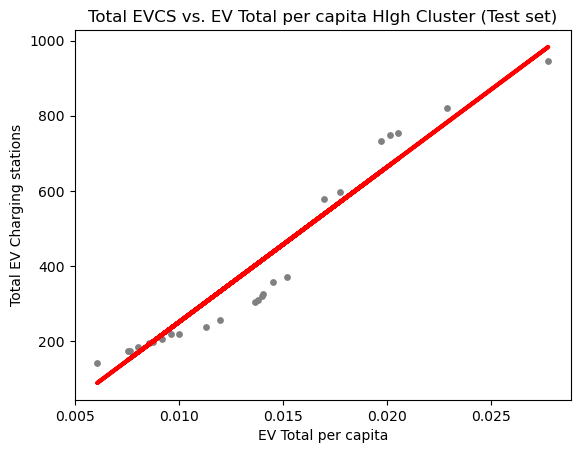

<Figure size 640x480 with 0 Axes>

In [60]:
# Visualizing the test set results
plt.scatter(X_test, y_test, color='gray', s=15)
plt.plot(X_test, y_predicted, color='red', linewidth=3)
plt.title('Total EVCS vs. EV Total per capita HIgh Cluster (Test set)')
plt.xlabel('EV Total per capita')
plt.ylabel('Total EV Charging stations')
plt.show()
plt.savefig("ML model HIGH cluster EVCS EV capita.png") 

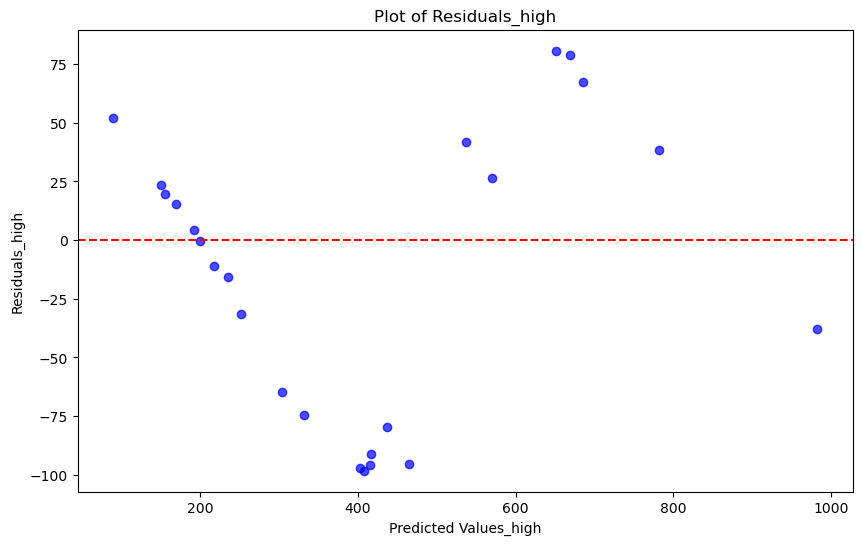

In [61]:
# Calculate residuals for the test set
residuals = y_test - y_predicted

# Create a DataFrame with predicted values, actual values, and residuals
residuals_df = pd.DataFrame({
    'Predicted Values_high': y_predicted.flatten(),
    'Actual Values_high': y_test.flatten(),
    'Residuals_high': residuals.flatten()
})

# Create a scatter plot of residuals against predicted values
plt.figure(figsize=(10, 6))
plt.scatter(residuals_df['Predicted Values_high'], residuals_df['Residuals_high'], color='blue', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Plot of Residuals_high')
plt.xlabel('Predicted Values_high')
plt.ylabel('Residuals_high')
plt.show()

In [62]:
# Export the residuals_df DataFrame to a CSV file
#export_path = os.path.join(path, '02 Data', 'Prepared Data', 'residuals_data_high.csv')
#residuals_df.to_csv(export_path, index=False)


In [63]:
#Creating a model for the Medium cluster

In [64]:
# Create a new DataFrame with the calculated column
med_cluster_data_p = medium_cluster_data.copy()
med_cluster_data_p['EV Total per capita'] = medium_cluster_data['EV Total'] / medium_cluster_data['Estimated Population']


In [65]:
# Check for 0 values in 'EV Total' column and replace them with a small non-zero value
med_cluster_data_p.loc[med_cluster_data_p['EV Total'] == 0, 'EV Total'] = 0.001

In [66]:
# Calculate the 'EV Total per capita' column
med_cluster_data_p['EV Total per capita'] = med_cluster_data_p['EV Total'] / med_cluster_data_p['Estimated Population']

In [67]:
# Prepare the features (X) and target (y)
X = med_cluster_data_p['EV Total per capita'].values.reshape(-1, 1)
y = med_cluster_data_p['Cum_CS_count'].values.reshape(-1, 1)

In [68]:
# Split data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [69]:
# Create a regression object and fit it onto the training set.
regression = LinearRegression() 
regression.fit(X_train, y_train)

LinearRegression()

In [70]:
# Predict the values of y using X.
y_predicted = regression.predict(X_test)

In [71]:
# Calculate mean squared error and R-squared
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [72]:
# Print the model summary statistics
print('Slope:', regression.coef_)
print('Mean squared error:', rmse)
print('R2 score:', r2)

Slope: [[4123.0799955]]
Mean squared error: 453.19953934219956
R2 score: 0.32431342287650333


In [73]:
# Compare the regression to the test data
y_predicted_train = regression.predict(X_train)
rmse_train = mean_squared_error(y_train, y_predicted_train)
r2_train = r2_score(y_train, y_predicted_train)
print('Slope:', regression.coef_)
print('Mean squared error (Train):', rmse_train)
print('R2 score (Train):', r2_train)


Slope: [[4123.0799955]]
Mean squared error (Train): 444.85293543401525
R2 score (Train): 0.3528438536089128


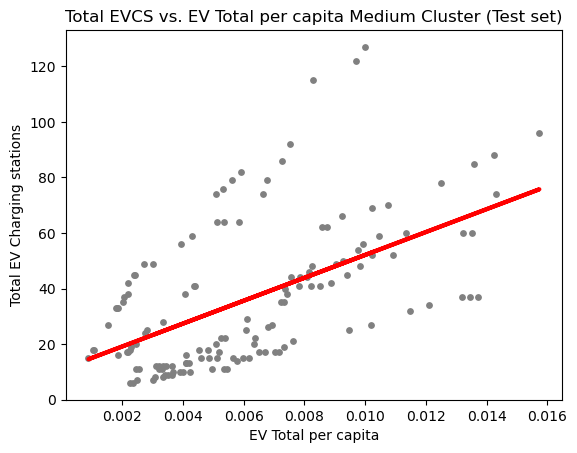

<Figure size 640x480 with 0 Axes>

In [74]:
# Visualizing the test set results
plt.scatter(X_test, y_test, color='gray', s=15)
plt.plot(X_test, y_predicted, color='red', linewidth=3)
plt.title('Total EVCS vs. EV Total per capita Medium Cluster (Test set)')
plt.xlabel('EV Total per capita')
plt.ylabel('Total EV Charging stations')
plt.show()
plt.savefig("ML model Medium cluster EVCS EV capita.png")

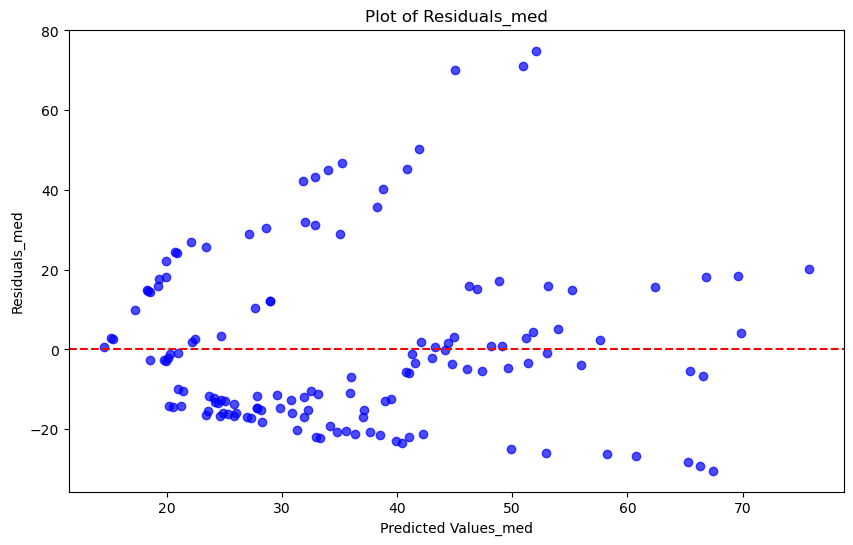

In [76]:
# Calculate residuals for the test set
residuals = y_test - y_predicted

# Create a new DataFrame for medium cluster residuals
residuals_df_med = pd.DataFrame({
    'Predicted Values_med': y_predicted.flatten(),
    'Actual Values_med': y_test.flatten(),
    'Residuals_med': residuals.flatten()
})

# Create a scatter plot of residuals against predicted values
plt.figure(figsize=(10, 6))
plt.scatter(residuals_df_med['Predicted Values_med'], residuals_df_med['Residuals_med'], color='blue', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Plot of Residuals_med')
plt.xlabel('Predicted Values_med')
plt.ylabel('Residuals_med')
plt.show()


In [77]:
# Export the medium cluster residuals_df DataFrame to a CSV file
#export_path_med = os.path.join(path, '02 Data', 'Prepared Data', 'residuals_df_med.csv')
#residuals_df_med.to_csv(export_path_med, index=False)
